<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/LR_ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
read_file = pd.read_csv (r'kc_house_price.txt')
read_file.to_csv (r'data.csv', index=None)
df=pd.read_csv (r'data.csv')
df=df[['price','sqft_living','bedrooms']]

In [125]:
df.info

<bound method DataFrame.info of           price  sqft_living  bedrooms
0      221900.0         1180         3
1      538000.0         2570         3
2      180000.0          770         2
3      604000.0         1960         4
4      510000.0         1680         3
...         ...          ...       ...
21592  360000.0         1530         3
21593  400000.0         2310         4
21594  402101.0         1020         2
21595  400000.0         1600         3
21596  325000.0         1020         2

[21597 rows x 3 columns]>

In [126]:
#eliminate outliers
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [127]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f6af09ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f6b006450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f6a8c6550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f6b07a950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f6ae67b50>],
 'means': []}

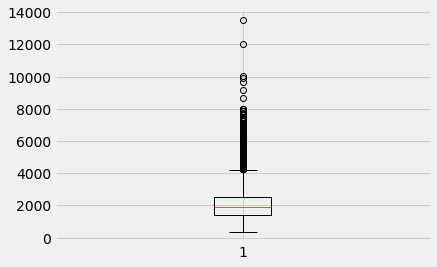

In [128]:
plt.boxplot(df['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f6a8e19d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f6a903950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f6b098e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f6a8f0e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f6a8f0910>],
 'means': []}

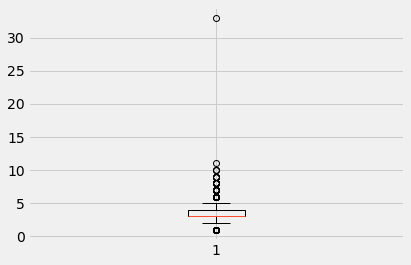

In [129]:
plt.boxplot(df['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f6a644cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f6a5cb790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f6a6103d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f6a5d2290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f6a5d27d0>],
 'means': []}

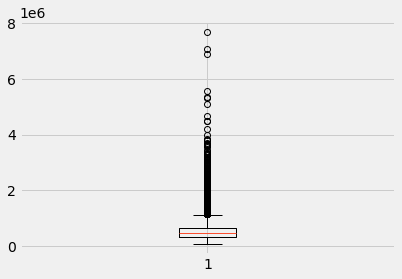

In [130]:
plt.boxplot(df['price'])

In [131]:
def list_of_data_of_outliers(q25,q75,col_name):
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  l2=np.where(df[col_name]>max)
  l1=np.where(df[col_name]<min)
  return np.union1d(l2,l1)
def union(l1,l2):
  return np.union1d(l1,l2)

In [101]:
a=df['bedrooms'].quantile([0.25,0.5,0.75]).to_list()
b=df['sqft_living'].quantile([0.25,0.5,0.75]).to_list()
c=df['price'].quantile([0.25,0.5,0.75]).to_list()

a1=list_of_data_of_outliers(a[0],a[2],'bedrooms')
b1=list_of_data_of_outliers(b[0],b[2],'sqft_living')
c1=list_of_data_of_outliers(c[0],c[2],'price')

d=union(a1,b1)
total=union(d,c1)


In [102]:
df_new=df.drop(total,axis=0)

In [132]:
df_new=df

In [133]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   bedrooms     21597 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f6a5b6e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f6a5ba950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f6a5f6e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f6a5c2450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f6a5c2990>],
 'means': []}

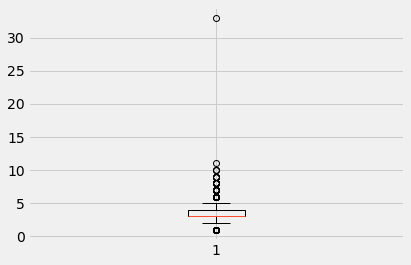

In [134]:
plt.boxplot(df_new['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f6a522e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f6a52a8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f6a571ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f6a5313d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f6a531910>],
 'means': []}

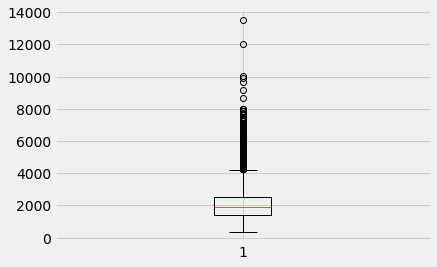

In [135]:
plt.boxplot(df_new['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f6a49b550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f6a49bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f6a4e7210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f6a4a3ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f6a4ab050>],
 'means': []}

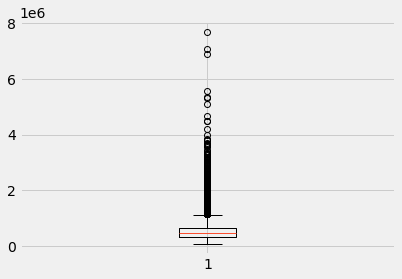

In [136]:
plt.boxplot(df_new['price'])

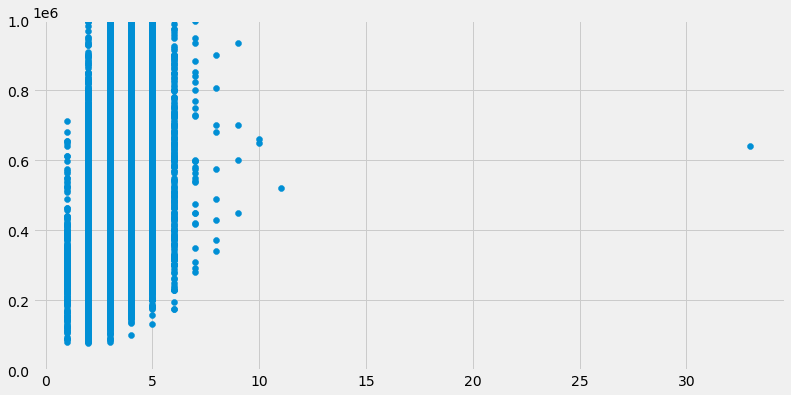

In [137]:
fig = plt.figure(figsize=(12,6))
plt.ylim([0,1000000])
plt.scatter(x=df_new['bedrooms'],y=df_new['price'])

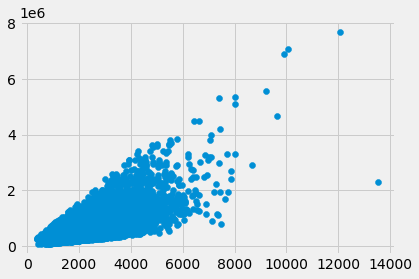

In [138]:
plt.scatter(x=df_new['sqft_living'],y=df_new['price'])

In [139]:
corr_matrix = df_new.corr()
print(corr_matrix)

                price  sqft_living  bedrooms
price        1.000000     0.701917  0.308787
sqft_living  0.701917     1.000000  0.578212
bedrooms     0.308787     0.578212  1.000000


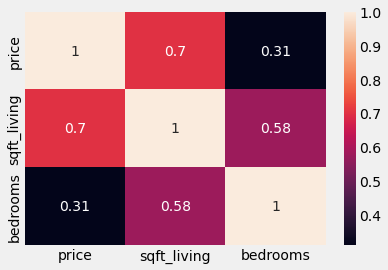

In [140]:
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()

(array([1.1091e+04, 7.9620e+03, 1.6000e+03, 5.1800e+02, 2.1500e+02,
        8.3000e+01, 5.7000e+01, 3.3000e+01, 1.6000e+01, 1.0000e+01,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  78000.,  459100.,  840200., 1221300., 1602400., 1983500.,
        2364600., 2745700., 3126800., 3507900., 3889000., 4270100.,
        4651200., 5032300., 5413400., 5794500., 6175600., 6556700.,
        6937800., 7318900., 7700000.]),
 <a list of 20 Patch objects>)

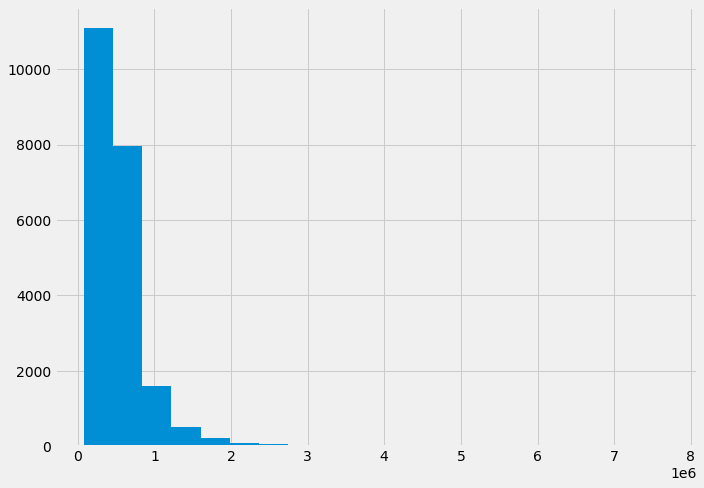

In [141]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(df_new['price'], bins = 20)

(array([1.690e+03, 6.664e+03, 6.372e+03, 3.793e+03, 1.833e+03, 7.480e+02,
        2.800e+02, 1.150e+02, 4.900e+01, 2.300e+01, 1.500e+01, 8.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  370. ,  1028.5,  1687. ,  2345.5,  3004. ,  3662.5,  4321. ,
         4979.5,  5638. ,  6296.5,  6955. ,  7613.5,  8272. ,  8930.5,
         9589. , 10247.5, 10906. , 11564.5, 12223. , 12881.5, 13540. ]),
 <a list of 20 Patch objects>)

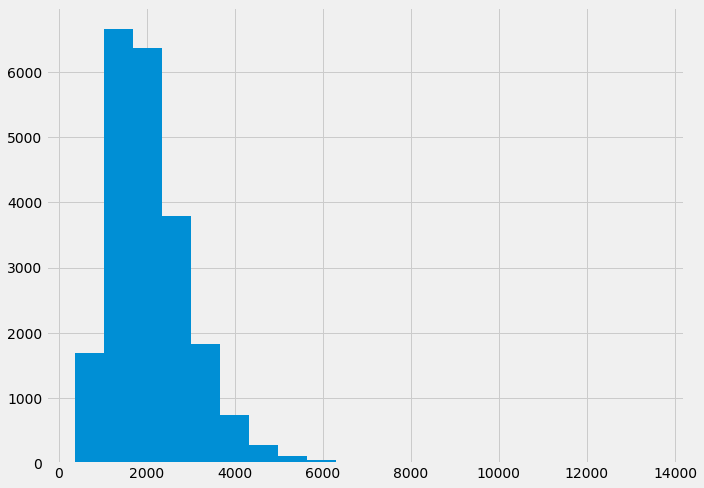

In [142]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['sqft_living'], bins = 20)

(array([2.9560e+03, 1.6706e+04, 1.6010e+03, 3.1000e+02, 1.3000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. ]),
 <a list of 20 Patch objects>)

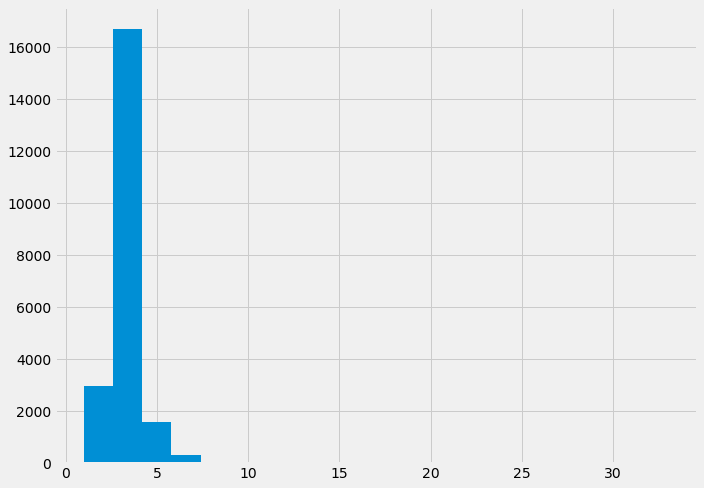

In [143]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['bedrooms'], bins = 20)

In [144]:
df1=df_new.to_numpy()

In [145]:
print(df_new['bedrooms'].skew())
print(df_new['price'].skew())
print(df_new['sqft_living'].skew())

2.023641235344595
4.023364652271239
1.473215455425834


In [146]:
df_new = df_new[['price','bedrooms','sqft_living']].apply(lambda x: np.log(x))

In [147]:
df_new.head()

,price,bedrooms,sqft_living
0,12.309982,1.098612,7.073270
1,13.195614,1.098612,7.851661
2,12.100712,0.693147,6.646391
3,13.311329,1.386294,7.580700
4,13.142166,1.098612,7.426549


In [148]:
print(df_new['bedrooms'].skew())
print(df_new['price'].skew())
print(df_new['sqft_living'].skew())

-0.6805637280656164
0.4310041773299232
-0.02736196977684956


In [149]:
df1=df_new.to_numpy()

(array([2.300e+01, 5.200e+01, 1.530e+02, 4.800e+02, 1.461e+03, 2.656e+03,
        3.419e+03, 3.811e+03, 3.578e+03, 2.644e+03, 1.720e+03, 6.560e+02,
        4.510e+02, 2.640e+02, 1.160e+02, 7.000e+01, 3.100e+01, 5.000e+00,
        4.000e+00, 3.000e+00]),
 array([11.26446411, 11.49407744, 11.72369078, 11.95330412, 12.18291746,
        12.4125308 , 12.64214414, 12.87175748, 13.10137082, 13.33098416,
        13.5605975 , 13.79021084, 14.01982417, 14.24943751, 14.47905085,
        14.70866419, 14.93827753, 15.16789087, 15.39750421, 15.62711755,
        15.85673089]),
 <a list of 20 Patch objects>)

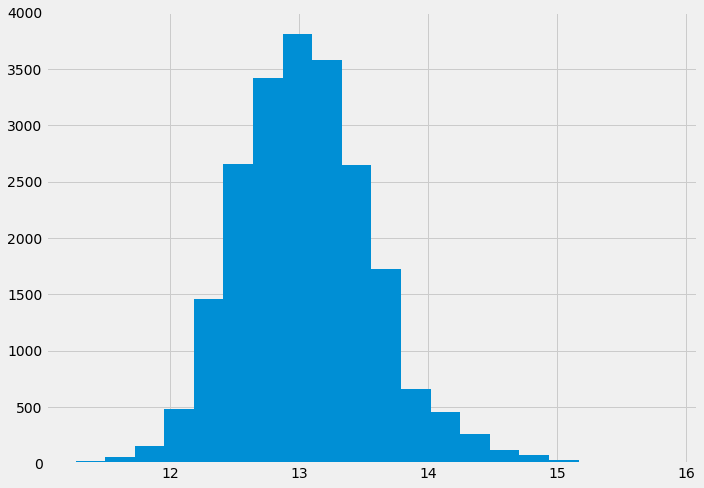

In [156]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['price'], bins = 20)

(array([8.000e+00, 1.600e+01, 5.000e+01, 2.580e+02, 6.380e+02, 1.154e+03,
        2.023e+03, 2.853e+03, 3.320e+03, 3.518e+03, 3.123e+03, 2.317e+03,
        1.349e+03, 6.380e+02, 2.120e+02, 8.100e+01, 2.900e+01, 5.000e+00,
        3.000e+00, 2.000e+00]),
 array([5.91350301, 6.09349803, 6.27349306, 6.45348809, 6.63348311,
        6.81347814, 6.99347317, 7.17346819, 7.35346322, 7.53345825,
        7.71345328, 7.8934483 , 8.07344333, 8.25343836, 8.43343338,
        8.61342841, 8.79342344, 8.97341847, 9.15341349, 9.33340852,
        9.51340355]),
 <a list of 20 Patch objects>)

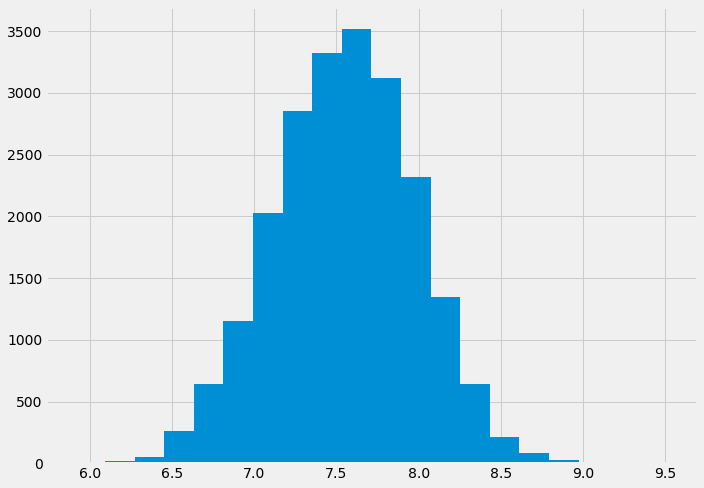

In [155]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['sqft_living'], bins = 20)

(array([1.960e+02, 0.000e+00, 0.000e+00, 2.760e+03, 0.000e+00, 0.000e+00,
        9.824e+03, 6.882e+03, 0.000e+00, 1.601e+03, 2.720e+02, 5.100e+01,
        6.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.17482538, 0.34965076, 0.52447613, 0.69930151,
        0.87412689, 1.04895227, 1.22377765, 1.39860302, 1.5734284 ,
        1.74825378, 1.92307916, 2.09790454, 2.27272991, 2.44755529,
        2.62238067, 2.79720605, 2.97203143, 3.14685681, 3.32168218,
        3.49650756]),
 <a list of 20 Patch objects>)

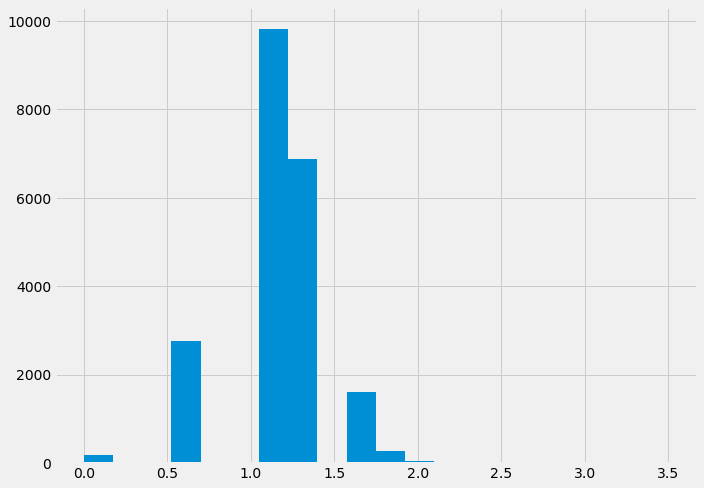

In [154]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df_new['bedrooms'], bins = 20)

In [41]:
from sklearn.preprocessing import StandardScaler
def standardized(dataset):
    scaler = StandardScaler()
    scaler.fit(dataset)
    dataset = scaler.transform(dataset)
    return dataset
    

In [152]:
t=standardized(df1)
X=t[:,[1,2]]
y=t[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
t.shape

(21597, 3)

In [150]:
X=df1[:,[1,2]]
y=df1[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [109]:
x=standardized(df1[:,[1,2]])


In [110]:
X=x
y=df_for_train[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Coefficients:  [-0.16671142  0.78647845]
Variance score: 0.46487765142813153


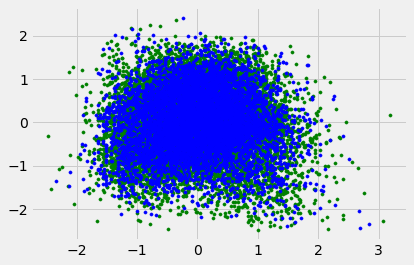

In [153]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')